In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re as re
import seaborn as sns
from scipy.stats import chi2_contingency

# Data processing

In [ ]:
db_fraud = pd.read_csv(r"bs140513_032310.csv")
db_fraud.head(4)             #import and read the datafile

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0


In [ ]:
db_fraud.drop(["zipcodeOri", "zipMerchant"], axis=1, inplace=True)
db_fraud.shape        #remove the zipcodes, they're unique

(594643, 8)

In [ ]:
db_fraud.category.unique()

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [ ]:
cols = ["customer", "age", "gender", "merchant","category"]
for col in cols:
    db_fraud[col]= db_fraud[col].apply(lambda x: x.replace('\'','')) #remove quotes from the columns
db_fraud.head(3)
db_fraud["category"].replace({"es_transportatio": "es_transportation"}, inplace=True) #correct the transavtion
#db_fraud["category"].replace(,[new_value1, new_value2, new_value3])
db_fraud.category.unique()

array(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],
      dtype=object)

In [ ]:
#change columns modalities
db_fraud["category"].replace(['es_transportation', 'es_health', 'es_otherservices', 'es_food',
       'es_hotelservices', 'es_barsandrestaurants', 'es_tech',
       'es_sportsandtoys', 'es_wellnessandbeauty', 'es_hyper',
       'es_fashion', 'es_home', 'es_contents', 'es_travel', 'es_leisure'],['transportation', 'health', 'otherservices', 'food',
       'hotelservices', 'barsandrestaurants', 'tech',
       'sportsandtoys', 'wellnessandbeauty', 'hyper',
       'fashion', 'home', 'contents', 'travel', 'leisure'], inplace=True)
db_fraud["age"].replace(["0", "1","2",
                              '3','4','5','6',"U"],["<=18 years",
                                                    "19-25 years","26-35 years","36-45 years",
                                                                  "46-55 years","56-65 years",">65 years", "Unknown"], inplace=True)


In [ ]:
db_fraud.info()
db_fraud[db_fraud.category.isna()==True]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   step      594643 non-null  int64  
 1   customer  594643 non-null  object 
 2   age       594643 non-null  object 
 3   gender    594643 non-null  object 
 4   merchant  594643 non-null  object 
 5   category  594643 non-null  object 
 6   amount    594643 non-null  float64
 7   fraud     594643 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 36.3+ MB


,step,customer,age,gender,merchant,category,amount,fraud


In [ ]:
fraud_transac = db_fraud[db_fraud["fraud"]==1]
good_transac = db_fraud[db_fraud["fraud"]==0]

In [ ]:
db_fraud.describe(include="all")

,step,customer,age,gender,merchant,category,amount,fraud
count,594643.000000,594643,594643,594643,594643,594643,594643.000000,594643.000000
unique,NaN,4112,8,4,50,15,NaN,NaN
top,NaN,C1978250683,26-35 years,F,M1823072687,transportation,NaN,NaN
freq,NaN,265,187310,324565,299693,505119,NaN,NaN
mean,94.986827,NaN,NaN,NaN,NaN,NaN,37.890135,0.012108
std,51.053632,NaN,NaN,NaN,NaN,NaN,111.402831,0.109369
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,52.000000,NaN,NaN,NaN,NaN,NaN,13.740000,0.000000
50%,97.000000,NaN,NaN,NaN,NaN,NaN,26.900000,0.000000
75%,139.000000,NaN,NaN,NaN,NaN,NaN,42.540000,0.000000


In [ ]:
def dummies_create(value, data=db_fraud):
  x=pd.get_dummies(data[value])
  return x
a = dummies_create(value="gender")
b = dummies_create(value="category")
c = dummies_create(value="customer")
d = dummies_create(value="merchant")
e = dummies_create(value="age") 
 #create dummies of each categorical variable


In [ ]:
pv_categ=db_fraud.pivot_table(index="step", columns="category", values="amount", aggfunc=np.sum)
pv_gender=db_fraud.pivot_table(index="step", columns="gender", values="amount", aggfunc=np.sum)
pv_age=db_fraud.pivot_table(index="step", columns="age", values="amount", aggfunc=np.sum)
pv_fraud=db_fraud.pivot_table(index="step", columns="fraud", values="amount", aggfunc=np.sum)
#pv_categ_age=db_fraud.pivot_table(index="category", columns="ageCateg", values="amount", aggfunc="count")

# Statistics and probability

Summary statistics

In [ ]:
for col in db_fraud.columns:
  data = db_fraud[col].nunique()
  print(f"{col} has {data} differents modalities.")
print(f"The number of transactions is : {len(db_fraud)}")
print(f"The total amount of transactions is: {db_fraud.amount.sum()}")
print(f"The average amunt of transactions is : {db_fraud.amount.mean()}")
print(f"The total of good transactions is: {len(good_transac)}")
print(f"The total amount of good transactions is : {good_transac.amount.sum()}")
print(f"The total of good transactions is: {len(fraud_transac)}")
print(f"The total amunt of bad transactions is : {fraud_transac.amount.sum()}")

step has 180 differents modalities.
customer has 4112 differents modalities.
age has 8 differents modalities.
gender has 4 differents modalities.
merchant has 50 differents modalities.
category has 15 differents modalities.
amount has 23767 differents modalities.
fraud has 2 differents modalities.
The number of transactions is : 594643
The total amount of transactions is: 22531103.730000004
The average amunt of transactions is : 37.890135308075614
The total of good transactions is: 587443
The total amount of good transactions is : 18708432.559999995
The total of good transactions is: 7200
The total amunt of bad transactions is : 3822671.1700000004


In [ ]:
def tab(col, data=db_fraud):
  tab = pd.DataFrame()
  tab["Total"] = data[col].value_counts(normalize=False).sort_values(ascending=False)
  tab["freq"] = data[col].value_counts(normalize=True)
  #amount_tab = pd.pivot_table(data=db_fraud, index= col, values='amount', aggfunc='sum')
  amount_tab = pd.pivot_table(data=db_fraud, index= col, values='amount', aggfunc='sum').sort_values(by="amount", ascending=False)
  #nb_unique = len(tab)
  return tab, amount_tab #nb_unique   #this function returns a table with the columns: total and frequence for each category.

In [ ]:
fraud, amount_fraud = tab(col = "fraud")
gender, amount_gender = tab(col = "gender")
category, amount_categ = tab(col = "category")
customer, amount_custom = tab(col = "customer")
merchant, amount_merchant = tab(col="merchant")
step, amount_step = tab(col = "step")
age_categ, amount_age_categ = tab(col="age")

In [ ]:
def print_summary(data, text = ""):
  print(text+"The two firt :")
  for l in data.iloc[:2, :].index:
    for col in data.iloc[:2, -2:].columns:
      print(f"{l} has {data.at[l,col]}")
  print("\nThe two latest :")
  for l in data.iloc[-2:, :].index:
    for col in data.iloc[:2, -2:].columns:
      print(f"{l} has {data.at[l,col]}")

In [ ]:
print_summary(gender, text="Transactions by gender :")


Transactions by gender :The two firt :
F has 324565
F has 0.5458148838883162
M has 268385
M has 0.45133802970858145

The two latest :
E has 1178
E has 0.0019810205451001694
U has 515
U has 0.0008660658580021963


In [ ]:
print_summary(amount_gender, text="Amount by gender :")

Amount by gender :The two firt :
F has 12727181.500000017
M has 9744547.789999869

The two latest :
E has 43147.33999999998
U has 16227.099999999991


In [ ]:
print_summary(category, text="transactions by category :")

transactions by category :The two firt :
transportation has 505119
transportation has 0.8494491652974978
food has 26254
food has 0.044150860264057595

The two latest :
travel has 728
travel has 0.001224263970146794
leisure has 499
leisure has 0.0008391589575594096


In [ ]:
print_summary(amount_categ, text="Amount by category :")

Amount by category :The two firt :
transportation has 13617092.459999343
health has 2187979.5099999947

The two latest :
otherservices has 123923.95000000004
contents has 39424.60000000002


In [ ]:
value=13617092.459999343/505119
print(f'The average money per transportation: {value}')

The average money per transportation: 26.958187001477558


In [ ]:
print_summary(customer, text="Transactions by gender :")

Transactions by gender :The two firt :
C1978250683 has 265
C1978250683 has 0.0004456455385836544
C1275518867 has 252
C1275518867 has 0.00042378368197389023

The two latest :
C1743702978 has 5
C1743702978 has 8.408406388370838e-06
C1404665203 has 5
C1404665203 has 8.408406388370838e-06


In [ ]:
print_summary(amount_custom, text="Transactions by gender :")

Transactions by gender :The two firt :
C806399525 has 83755.49000000009
C2004941826 has 64751.08000000002

The two latest :
C1924305208 has 398.17999999999995
C849065220 has 390.57


Marginal frequency

In [ ]:
def tab_cross(col1, col2, data=db_fraud):
    tb = pd.crosstab(data[col1], data[col2], margins= True, normalize=False)
    tb1 = pd.crosstab(data[col1], data[col2], margins= True, normalize=True)
    tb2 = pd.crosstab(data[col1], data[col2], margins= True, normalize="columns")
    tb3 = pd.crosstab(data[col1], data[col2], margins= True, normalize="index")
    chi2, pval, dof, expected = chi2_contingency(tb.iloc[:-1, :-1])
    return tb, tb1, tb2, tb3, pval   #realize different types of croosstable on the data test the dependency between them.(Chi-square)

In [ ]:
#crosstable for fraud and gender and probability calculus and chi-square test
tb_gen_fraud, tb1_gen_fraud, tb2_gen_fraud, tb3_gen_fraud, pval1 = tab_cross(col1 ="gender", col2="fraud")

#crosstable for category and fraud probability calculus and chi-square test
tb_categ_fraud, tb1_categ_fraud, tb2_categ_fraud, tb3_categ_fraud, pval2 = tab_cross(col1 ="category", col2="fraud")

#crosstable for age and fraud probability calculus and chi-square test
tb_age_fraud, tb1_age_fraud, tb2_age_fraud, tb3_age_fraud, pval3 = tab_cross(col1 = "age" , col2= "fraud")

tb_age_categ, tb1_age_categ, tb2_age_categ, tb3_age_categ, pval4 = tab_cross(col1 = "age", col2="category")

In [ ]:
def print_frequency(data, text = ""):
  print(text)
  for l in data.index:
    for col in data.columns[1:2]:
      print(f"Among {l}, {round(data.at[l,col]*100, 2)} percent of the transactions are fraudulent.")

In [ ]:
print_frequency(tb3_categ_fraud, text="")


Among barsandrestaurants, 1.88 percent of the transactions are fraudulent.
Among contents, 0.0 percent of the transactions are fraudulent.
Among fashion, 1.8 percent of the transactions are fraudulent.
Among food, 0.0 percent of the transactions are fraudulent.
Among health, 10.51 percent of the transactions are fraudulent.
Among home, 15.21 percent of the transactions are fraudulent.
Among hotelservices, 31.42 percent of the transactions are fraudulent.
Among hyper, 4.59 percent of the transactions are fraudulent.
Among leisure, 94.99 percent of the transactions are fraudulent.
Among otherservices, 25.0 percent of the transactions are fraudulent.
Among sportsandtoys, 49.53 percent of the transactions are fraudulent.
Among tech, 6.67 percent of the transactions are fraudulent.
Among transportation, 0.0 percent of the transactions are fraudulent.
Among travel, 79.4 percent of the transactions are fraudulent.
Among wellnessandbeauty, 4.76 percent of the transactions are fraudulent.
Amon

In [ ]:
print_frequency(tb1_age_fraud, text="")
#tb1_age_fraud


Among 19-25 years, 0.12 percent of the transactions are fraudulent.
Among 26-35 years, 0.39 percent of the transactions are fraudulent.
Among 36-45 years, 0.3 percent of the transactions are fraudulent.
Among 46-55 years, 0.24 percent of the transactions are fraudulent.
Among 56-65 years, 0.12 percent of the transactions are fraudulent.
Among <=18 years, 0.01 percent of the transactions are fraudulent.
Among >65 years, 0.04 percent of the transactions are fraudulent.
Among Unknown, 0.0 percent of the transactions are fraudulent.
Among All, 1.21 percent of the transactions are fraudulent.


In [ ]:
print_frequency(tb3_gen_fraud, text="")


Among E, 0.59 percent of the transactions are fraudulent.
Among F, 1.47 percent of the transactions are fraudulent.
Among M, 0.91 percent of the transactions are fraudulent.
Among U, 0.0 percent of the transactions are fraudulent.
Among All, 1.21 percent of the transactions are fraudulent.


In [ ]:
def chisq_decision(pval, text = ""):
  if pval<0.05:
    print(f"There is dependency between {text} with a level significance of 95%")
  else:
    print(f"No depedency betwenn {text} with a level significance of 95%")

In [ ]:
chisq_decision(pval1, text="Sex and fraud")

There is dependency between Sex and fraud with a level significance of 95%


In [ ]:
chisq_decision(pval2, text="Category and fraud")


There is dependency between Category and fraud with a level significance of 95%


In [ ]:
chisq_decision(pval3, text="Age and fraud")

There is dependency between Age and fraud with a level significance of 95%


In [ ]:
chisq_decision(pval4, text="Age and category")

There is dependency between Age and category with a level significance of 95%


In [ ]:
x = db_fraud[db_fraud["fraud"]==1]
x = x[["category"]]
y = x.value_counts(normalize=True)
y

category          
sportsandtoys         0.275278
health                0.235556
wellnessandbeauty     0.099722
travel                0.080278
hotelservices         0.076111
leisure               0.065833
home                  0.041944
hyper                 0.038889
otherservices         0.031667
tech                  0.021944
barsandrestaurants    0.016667
fashion               0.016111
dtype: float64

In [ ]:
amount_day = db_fraud[["amount","step", "category"]].groupby(pd.Grouper(key="step")).sum()

# Exploratory Data Analysis

UNIVARIATE ANALYSIS

No handles with labels found to put in legend.


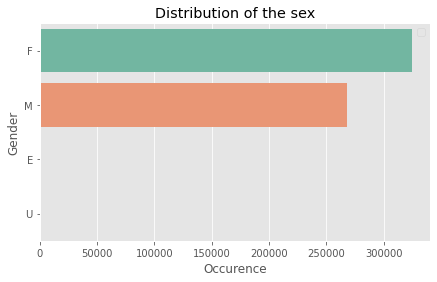

In [ ]:
def myplot(data, title="",label="Occurence",y="", figsize = (8,5)):
    plt.style.use("ggplot")
    plt.figure(figsize=figsize)
    sns.set_palette('Set2')
    sns.barplot(y=data.index,  x= data.Total)
    plt.title(title)
    plt.xlabel(label)
    plt.ylabel(y)
    plt.legend()
    plt.show
myplot(gender[:], title="Distribution of the sex", y="Gender", figsize=(7,4))

We remark over 300 000 women in our data, a small quantity of enterprise use the credit card.

No handles with labels found to put in legend.


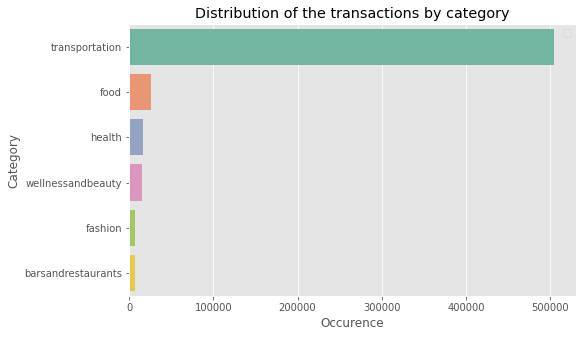

In [ ]:
myplot(category[:6], title="Distribution of the transactions by category", y="Category")

The majority of transactions are from the transportation service, while we remark they are 0 fraud.

No handles with labels found to put in legend.


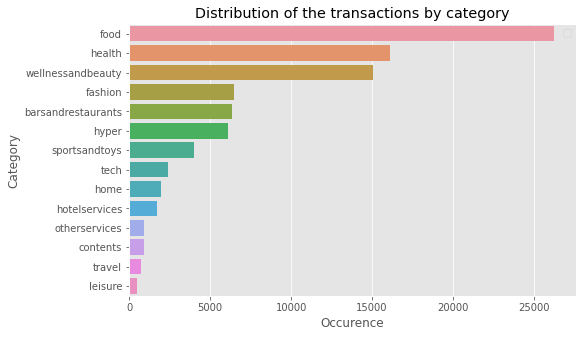

In [ ]:
myplot(category[1:], title="Distribution of the transactions by category", y="Category")

Leisure is the least used service, we remark they have 94.99 % of fraud.

No handles with labels found to put in legend.


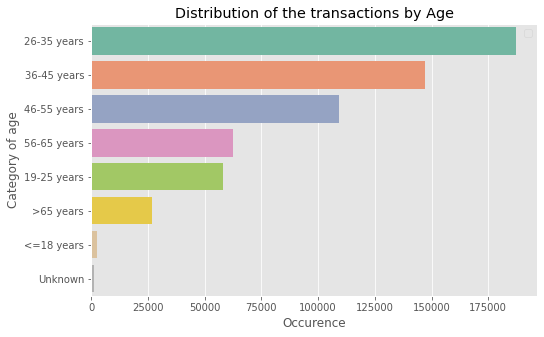

In [ ]:
myplot(age_categ, title="Distribution of the transactions by Age", y="Category of age")

The 18-25 years use the card more than any other class, 39% of them are victims of fraud.

Text(0.5, 1.0, 'Daily trend of the transactions amount')

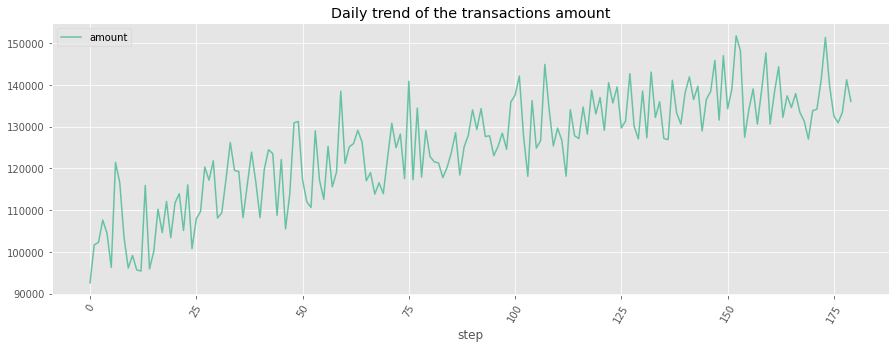

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
amount_step.reset_index().sort_values(by="step").plot.line(x = "step", y = ["amount"], rot = 60, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.title("Daily trend of the transactions amount")

The general trend of the transactions is increasing.

Text(0.5, 1.0, 'Daily trend of the transactions amount by sex')

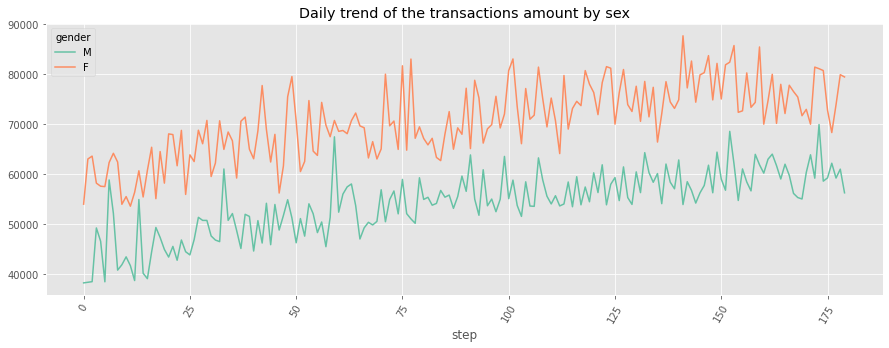

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
pv_gender.reset_index().plot.line(x = "step", y = ["M", "F"], rot = 60, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.title("Daily trend of the transactions amount by sex")

The transactions trend of the women seems to be the same but the amount done by yhe women are bigger. They evoluate at the same time but the total amount of transactions stays bigger.

Text(0.5, 1.0, 'Daily trend of the transactions amount by category')

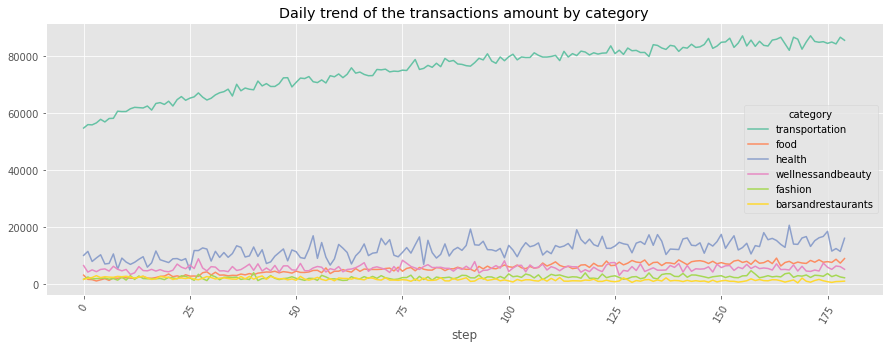

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
pv_categ.reset_index().plot.line(x = "step", y =["transportation" ,"food", "health", "wellnessandbeauty", "fashion", "barsandrestaurants"], rot = 60, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.title("Daily trend of the transactions amount by category")

Like we have seen the amount of money in transportation transactions is bigger than the others added. They represent 84% of the transactions.

Text(0.5, 1.0, 'Daily trend of the transactions amount wheter they are fraud or not')

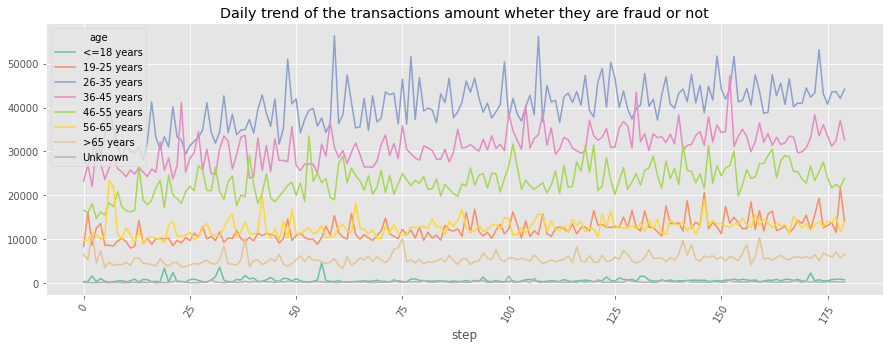

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
pv_age.reset_index().plot.line(x = "step", y = ["<=18 years",
                                                    "19-25 years","26-35 years","36-45 years",
                                                                  "46-55 years","56-65 years",">65 years", "Unknown"] , rot = 60, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.title("Daily trend of the transactions amount wheter they are fraud or not")

Daily trend of the transactions amount by age, the 26-35 years by more daily than any other class of age and they are the most victimized of fraudulent transactions among class of age.

Text(0.5, 1.0, 'Daily trend of the transactions amount wheter they are fraud or not')

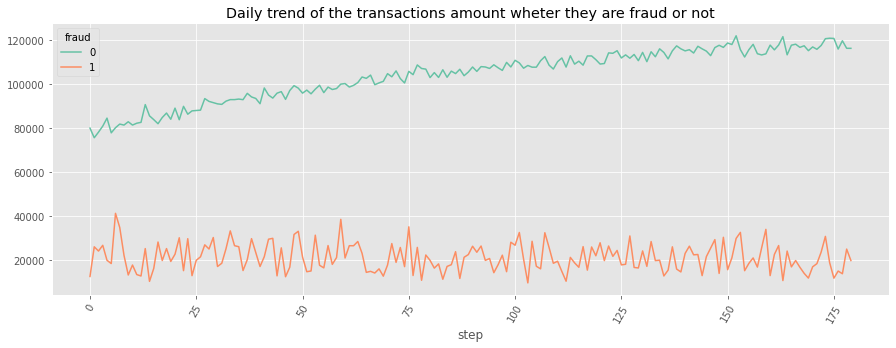

In [ ]:
fig, ax = plt.subplots(figsize=(15,5))
pv_fraud.reset_index().plot.line(x = "step", y =[0,1], rot = 60, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.title("Daily trend of the transactions amount wheter they are fraud or not")

1.21% of the transactions are fraudulent, they never depass 40000 a day. The good transactions represent over 98% , they are over 80000 a day.

Text(0.5, 1.0, 'Histogram of the transactions amount')

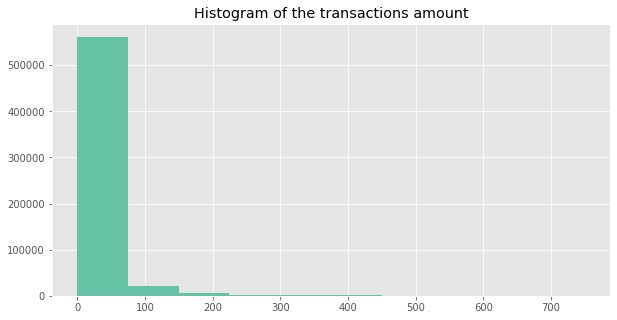

In [ ]:
db_fraud[db_fraud.amount<750].hist(column="amount", figsize=(10,5))
plt.title("Histogram of the transactions amount")

The transactions are generally between 0 and 100 dollars. We understand that. The transportation represent 84% of the total transactions and the amount average per transportation is 26.95 dollars

# Modeling

# Result

Thoughts on fraudulent transactions

In [ ]:
fraud_transac.head(2)

,step,customer,age,gender,merchant,category,amount,fraud
88,0,C583110837,36-45 years,M,M480139044,health,44.26,1
89,0,C1332295774,36-45 years,M,M480139044,health,324.50,1


In [ ]:
fraud

,Total,freq
0,587443,0.987892
1,7200,0.012108


In [ ]:
fraud_money = fraud_transac.amount.sum()
print(fraud_money)

3822671.1700000004


Text(0.5, 1.0, 'Daily trend of the fraudulent transactions amount')

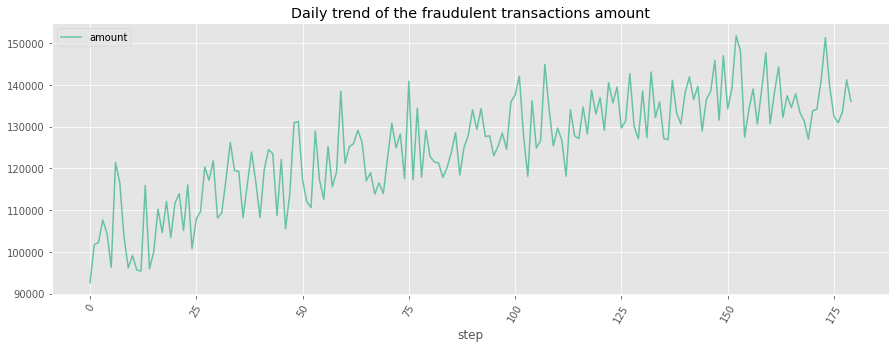

In [ ]:
amount_day1 = db_fraud[["amount","step", "category"]].groupby(pd.Grouper(key="step")).sum()
fig, ax = plt.subplots(figsize=(15,5))
amount_day1.reset_index().plot.line(x = "step", y = ["amount"], rot = 60, ax = ax)
for p in ax.patches: 
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))
plt.title("Daily trend of the fraudulent transactions amount")

Text(0.5, 1.0, 'Boxplot of the transactions amount')

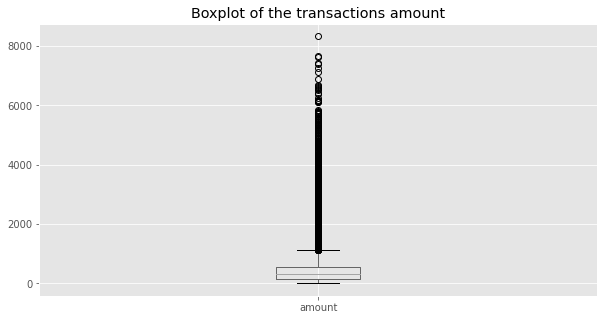

In [ ]:
fraud_transac.boxplot(column="amount",figsize=(10,5))
plt.title("Boxplot of the transactions amount")

In [ ]:
#fraud_transac[fraud_transac["amount"]].hist(column="amount", figsize=(10,5))

Fraudulent transactions tend to increase day by day. What is amazing to note is that there are frauds every day, so the control must be pushed continuously. Hence the urgency for the bank to solve the problem as soon as possible otherwise it risks losing many of its customers. The total amount of fraudulent transactions is 7200 wich represent 3822671.17 dollars us.

In [ ]:
print(tb3_gen_fraud)
print("We performed a chi-square test to see if gender has some dependence on whether one is a victim of fraud or not. \nThe {pval1} in inferior to 0.05")
print("We conclude that there is dependency between gender and fraud.")
print("A woman would be more exposed to fraud than a man and those who do not specify their sex are less at risk. In fact, none of them were victims.")

fraud          0         1
gender                    
E       0.994058  0.005942
F       0.985340  0.014660
M       0.990927  0.009073
U       1.000000  0.000000
All     0.987892  0.012108
We performed a chi-square test to see if gender has some dependence on whether one is a victim of fraud or not. 
The {pval1} in inferior to 0.05
We conclude that there is dependency between gender and fraud.
A woman would be more exposed to fraud than a man and those who do not specify their sex are less at risk. In fact, none of them were victims.


In [ ]:
tb1_gen_fraud
tb_categ_fraud

fraud,0,1,All
category,,,
barsandrestaurants,6253,120,6373
contents,885,0,885
fashion,6338,116,6454
food,26254,0,26254
health,14437,1696,16133
home,1684,302,1986
hotelservices,1196,548,1744
hyper,5818,280,6098
leisure,25,474,499


Text(0.5, 1.0, 'Sex by fraudulent transactions')

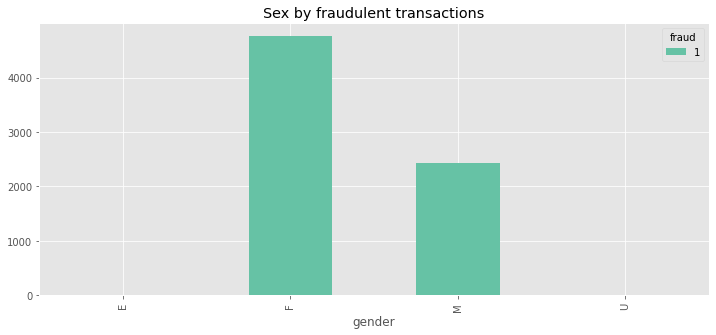

In [ ]:
plot1 = tb_gen_fraud.iloc[:-1, 1:2].plot(kind="bar", figsize=(12,5))
plt.title("Sex by fraudulent transactions")

In [ ]:
tb3_gen_fraud

fraud,0,1
gender,,
E,0.994058,0.005942
F,0.985340,0.014660
M,0.990927,0.009073
U,1.000000,0.000000
All,0.987892,0.012108


In [ ]:
print(tb3_categ_fraud)
print("We performed a chi-square test to see if category has some dependence on whether one is a victim of fraud or not. \nThe {pval1} in inferior to 0.05")
print("We conclude that there is dependency between category and fraud.")
print("The leisure service would be more exposed to fraud, 94% ot them are fraudulent. Food, contents and transportation are not at risk. In fact, none of them were victims.")

fraud                      0         1
category                              
barsandrestaurants  0.981171  0.018829
contents            1.000000  0.000000
fashion             0.982027  0.017973
food                1.000000  0.000000
health              0.894874  0.105126
home                0.847936  0.152064
hotelservices       0.685780  0.314220
hyper               0.954083  0.045917
leisure             0.050100  0.949900
otherservices       0.750000  0.250000
sportsandtoys       0.504748  0.495252
tech                0.933333  0.066667
transportation      1.000000  0.000000
travel              0.206044  0.793956
wellnessandbeauty   0.952406  0.047594
All                 0.987892  0.012108
We performed a chi-square test to see if category has some dependence on whether one is a victim of fraud or not. 
The {pval1} in inferior to 0.05
We conclude that there is dependency between category and fraud.
The leisure service would be more exposed to fraud, 94% ot them are fraudulent. Food, 

Text(0.5, 1.0, 'Age by fraudulent transactions')

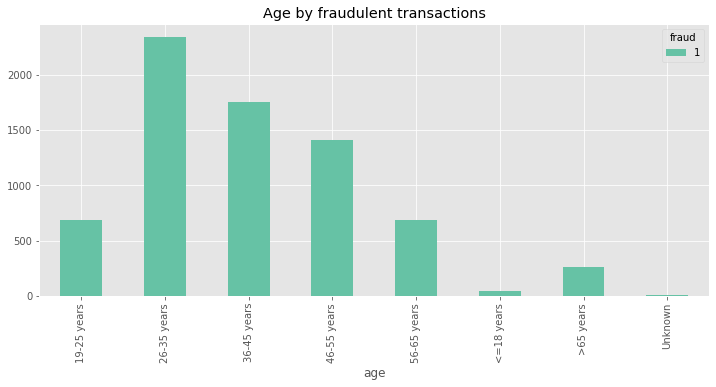

In [ ]:
plot1 = tb_age_fraud.iloc[:-1, 1:2].plot(kind="bar", figsize=(12,5))
plt.title("Age by fraudulent transactions")


The second class, 26-35 years old, is the most victimized age range among the fraudulent transactions.

Text(0.5, 1.0, 'Category by fraudulent transactions')

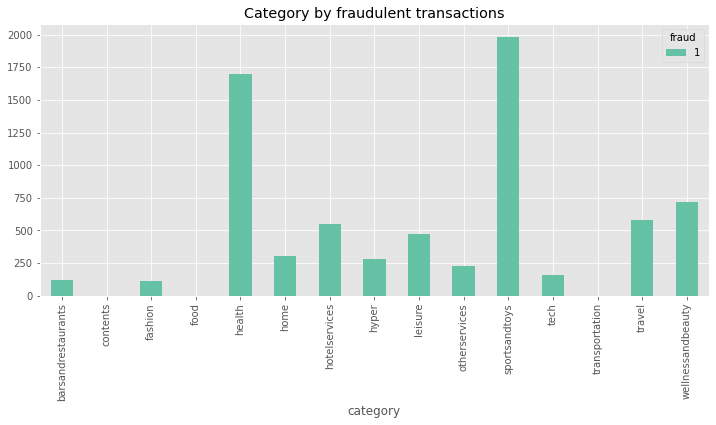

In [ ]:
plot1 = tb_categ_fraud.iloc[:-1, 1:2].plot(kind="bar", figsize=(12,5))
plt.title("Category by fraudulent transactions")

Sports and toys is the most used service among the fraudulent transactions

In **sport and health**, there is a greater amount of fraudulent transactions.

In [ ]:
#Create class of amount
db_fraud1 = db_fraud.reset_index()
db_fraud1['ZZ']=pd.cut(db_fraud1.amount.values,90,ordered=True)
# Summarise dataframe using pivot table: Fraud & Class of amount
fraud_amount_bank_pivot1=pd.pivot_table(db_fraud1,values="index", index=['fraud',],
columns=['ZZ'], aggfunc="count",fill_value =0)
#Apply Test
stat, p, dof, expected = chi2_contingency(fraud_amount_bank_pivot1.values)
print("p-values:",p)
if p < 0.05:
 print("Hypothesis Rejected")
else:
 print("Hypothesis Accepted")
fraud_amount_bank_pivot1

p-values: 0.0
Hypothesis Rejected


ZZ,"(-8.33, 92.555]","(92.555, 185.11]","(185.11, 277.665]","(277.665, 370.22]","(370.22, 462.776]","(462.776, 555.331]","(555.331, 647.886]","(647.886, 740.441]","(740.441, 832.996]","(832.996, 925.551]","(925.551, 1018.106]","(1018.106, 1110.661]","(1110.661, 1203.216]","(1203.216, 1295.772]","(1295.772, 1388.327]","(1388.327, 1480.882]","(1480.882, 1573.437]","(1573.437, 1665.992]","(1665.992, 1758.547]","(1758.547, 1851.102]","(1851.102, 1943.657]","(1943.657, 2036.212]","(2036.212, 2128.768]","(2128.768, 2221.323]","(2221.323, 2313.878]","(2313.878, 2406.433]","(2406.433, 2498.988]","(2498.988, 2591.543]","(2591.543, 2684.098]","(2684.098, 2776.653]","(2776.653, 2869.208]","(2869.208, 2961.764]","(2961.764, 3054.319]","(3054.319, 3146.874]","(3146.874, 3239.429]","(3239.429, 3331.984]","(3331.984, 3424.539]","(3424.539, 3517.094]","(3517.094, 3609.649]","(3609.649, 3702.204]","(3702.204, 3794.76]","(3794.76, 3887.315]","(3887.315, 3979.87]","(3979.87, 4072.425]","(4072.425, 4164.98]","(4164.98, 4257.535]","(4257.535, 4350.09]","(4350.09, 4442.645]","(4442.645, 4535.2]","(4535.2, 4627.756]","(4627.756, 4720.311]","(4720.311, 4812.866]","(4812.866, 4905.421]","(4905.421, 4997.976]","(4997.976, 5090.531]","(5090.531, 5183.086]","(5183.086, 5275.641]","(5275.641, 5368.196]","(5368.196, 5460.752]","(5460.752, 5553.307]","(5553.307, 5645.862]","(5645.862, 5738.417]","(5738.417, 5830.972]","(5830.972, 5923.527]","(6108.637, 6201.192]","(6201.192, 6293.748]","(6293.748, 6386.303]","(6386.303, 6478.858]","(6478.858, 6571.413]","(6571.413, 6663.968]","(6663.968, 6756.523]","(6849.078, 6941.633]","(7126.744, 7219.299]","(7219.299, 7311.854]","(7311.854, 7404.409]","(7404.409, 7496.964]","(7589.519, 7682.074]","(8237.405, 8329.96]"
fraud,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,570585,13361,2815,502,85,15,8,13,11,11,7,2,2,9,3,2,5,1,0,2,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1059,1007,1053,1046,736,529,426,288,223,155,93,72,42,14,19,23,13,10,7,17,15,16,11,9,10,14,13,7,11,10,12,14,8,13,6,6,11,3,9,12,6,7,7,11,6,13,6,5,3,5,8,12,4,6,1,4,4,5,2,5,2,6,5,1,7,1,1,1,2,3,1,1,1,1,1,1,2,1


In [ ]:
db_fraud2=db_fraud.copy()
db_fraud2["Class_amount"] = db_fraud["amount"].apply(lambda x: "inf to 2000" if x<2000 else "Sup to 2000")
pv_fraude2=db_fraud2.pivot_table(index="Class_amount", columns="fraud", values="amount", aggfunc="count")
pv_fraude2

fraud,0,1
Class_amount,,
Sup to 2000,1,343
inf to 2000,587442,6857


We have shown that there is a dependency between the amount of purchases and whether there is fraud or not.  The pivot table above shows that from 2000 dollars for a transaction, there are no more safe transactions. The bank needs to increase control over these transactions.

The reduction on frauds if we cancel the transactions over 2000 because they are mostly fraudulent.

In [ ]:
a=fraud_transac[fraud_transac["amount"]>2000]["amount"].sum()
print(a)

1298859.8499999999


The reduction on frauds if we cancel the transactions for the leisure services.

In [ ]:
b=fraud_transac[fraud_transac.category=="leisure"]["amount"].sum()
b

142335.97999999998

In [ ]:
save_money = a+b
percent_save = (save_money/fraud_money)*100
print(f"The amount of money the customers could save from fraud if \nwe stop leisure and transactions over 2000 us is {round(save_money,2)}.\nThey represent a reduction of {round(percent_save,2)}%")

The amount of money the customers could save from fraud if 
we stop leisure and transactions over 2000 us is 1441195.83.
They represent a reduction of 37.7%
